In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\imarticus\capstone project1\car_price.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
#checking null or missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
last_dataset=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [9]:
last_dataset['current_year']=2024

In [10]:
last_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2024
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2024
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2024
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2024
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2024


In [11]:
last_dataset['no_year']=last_dataset['current_year']-last_dataset['year']

In [12]:
last_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2024,17
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2024,17
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2024,12
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2024,7
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2024,10


In [13]:
last_dataset.drop(['year'],axis=1,inplace=True)

In [14]:
last_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,2024,17
1,135000,50000,Petrol,Individual,Manual,First Owner,2024,17
2,600000,100000,Diesel,Individual,Manual,First Owner,2024,12
3,250000,46000,Petrol,Individual,Manual,First Owner,2024,7
4,450000,141000,Diesel,Individual,Manual,Second Owner,2024,10


In [15]:
last_dataset.drop(['current_year'],axis=1,inplace=True)

In [16]:
last_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,17
1,135000,50000,Petrol,Individual,Manual,First Owner,17
2,600000,100000,Diesel,Individual,Manual,First Owner,12
3,250000,46000,Petrol,Individual,Manual,First Owner,7
4,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [17]:
last_dataset=pd.get_dummies(last_dataset,drop_first = True,dtype=int)

In [18]:
last_dataset.head(10)

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,17,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,17,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,12,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,7,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,10,1,0,0,0,1,0,1,0,1,0,0
5,140000,125000,17,0,0,0,1,1,0,1,0,0,0,0
6,550000,25000,8,0,0,0,1,1,0,1,0,0,0,0
7,240000,60000,10,0,0,0,1,1,0,1,0,1,0,0
8,850000,25000,9,0,0,0,1,1,0,1,0,0,0,0
9,365000,78000,7,0,0,0,0,1,0,1,0,0,0,0


In [19]:

correlation_matrix = last_dataset.corr(numeric_only=True)
print(correlation_matrix)

                              selling_price  km_driven   no_year  fuel_Diesel  \
selling_price                      1.000000  -0.192289 -0.413922     0.282947   
km_driven                         -0.192289   1.000000  0.419688     0.285396   
no_year                           -0.413922   0.419688  1.000000    -0.121424   
fuel_Diesel                        0.282947   0.285396 -0.121424     1.000000   
fuel_Electric                     -0.005095  -0.001372  0.025540    -0.015063   
fuel_LPG                          -0.042434   0.036652  0.051266    -0.072422   
fuel_Petrol                       -0.269453  -0.291139  0.114908    -0.970934   
seller_type_Individual            -0.236798   0.182663  0.173703    -0.035314   
seller_type_Trustmark Dealer       0.110176  -0.089858 -0.100225    -0.007911   
transmission_Manual               -0.530205   0.120226  0.143800    -0.048098   
owner_Fourth & Above Owner        -0.078725   0.097349  0.186361    -0.021054   
owner_Second Owner          

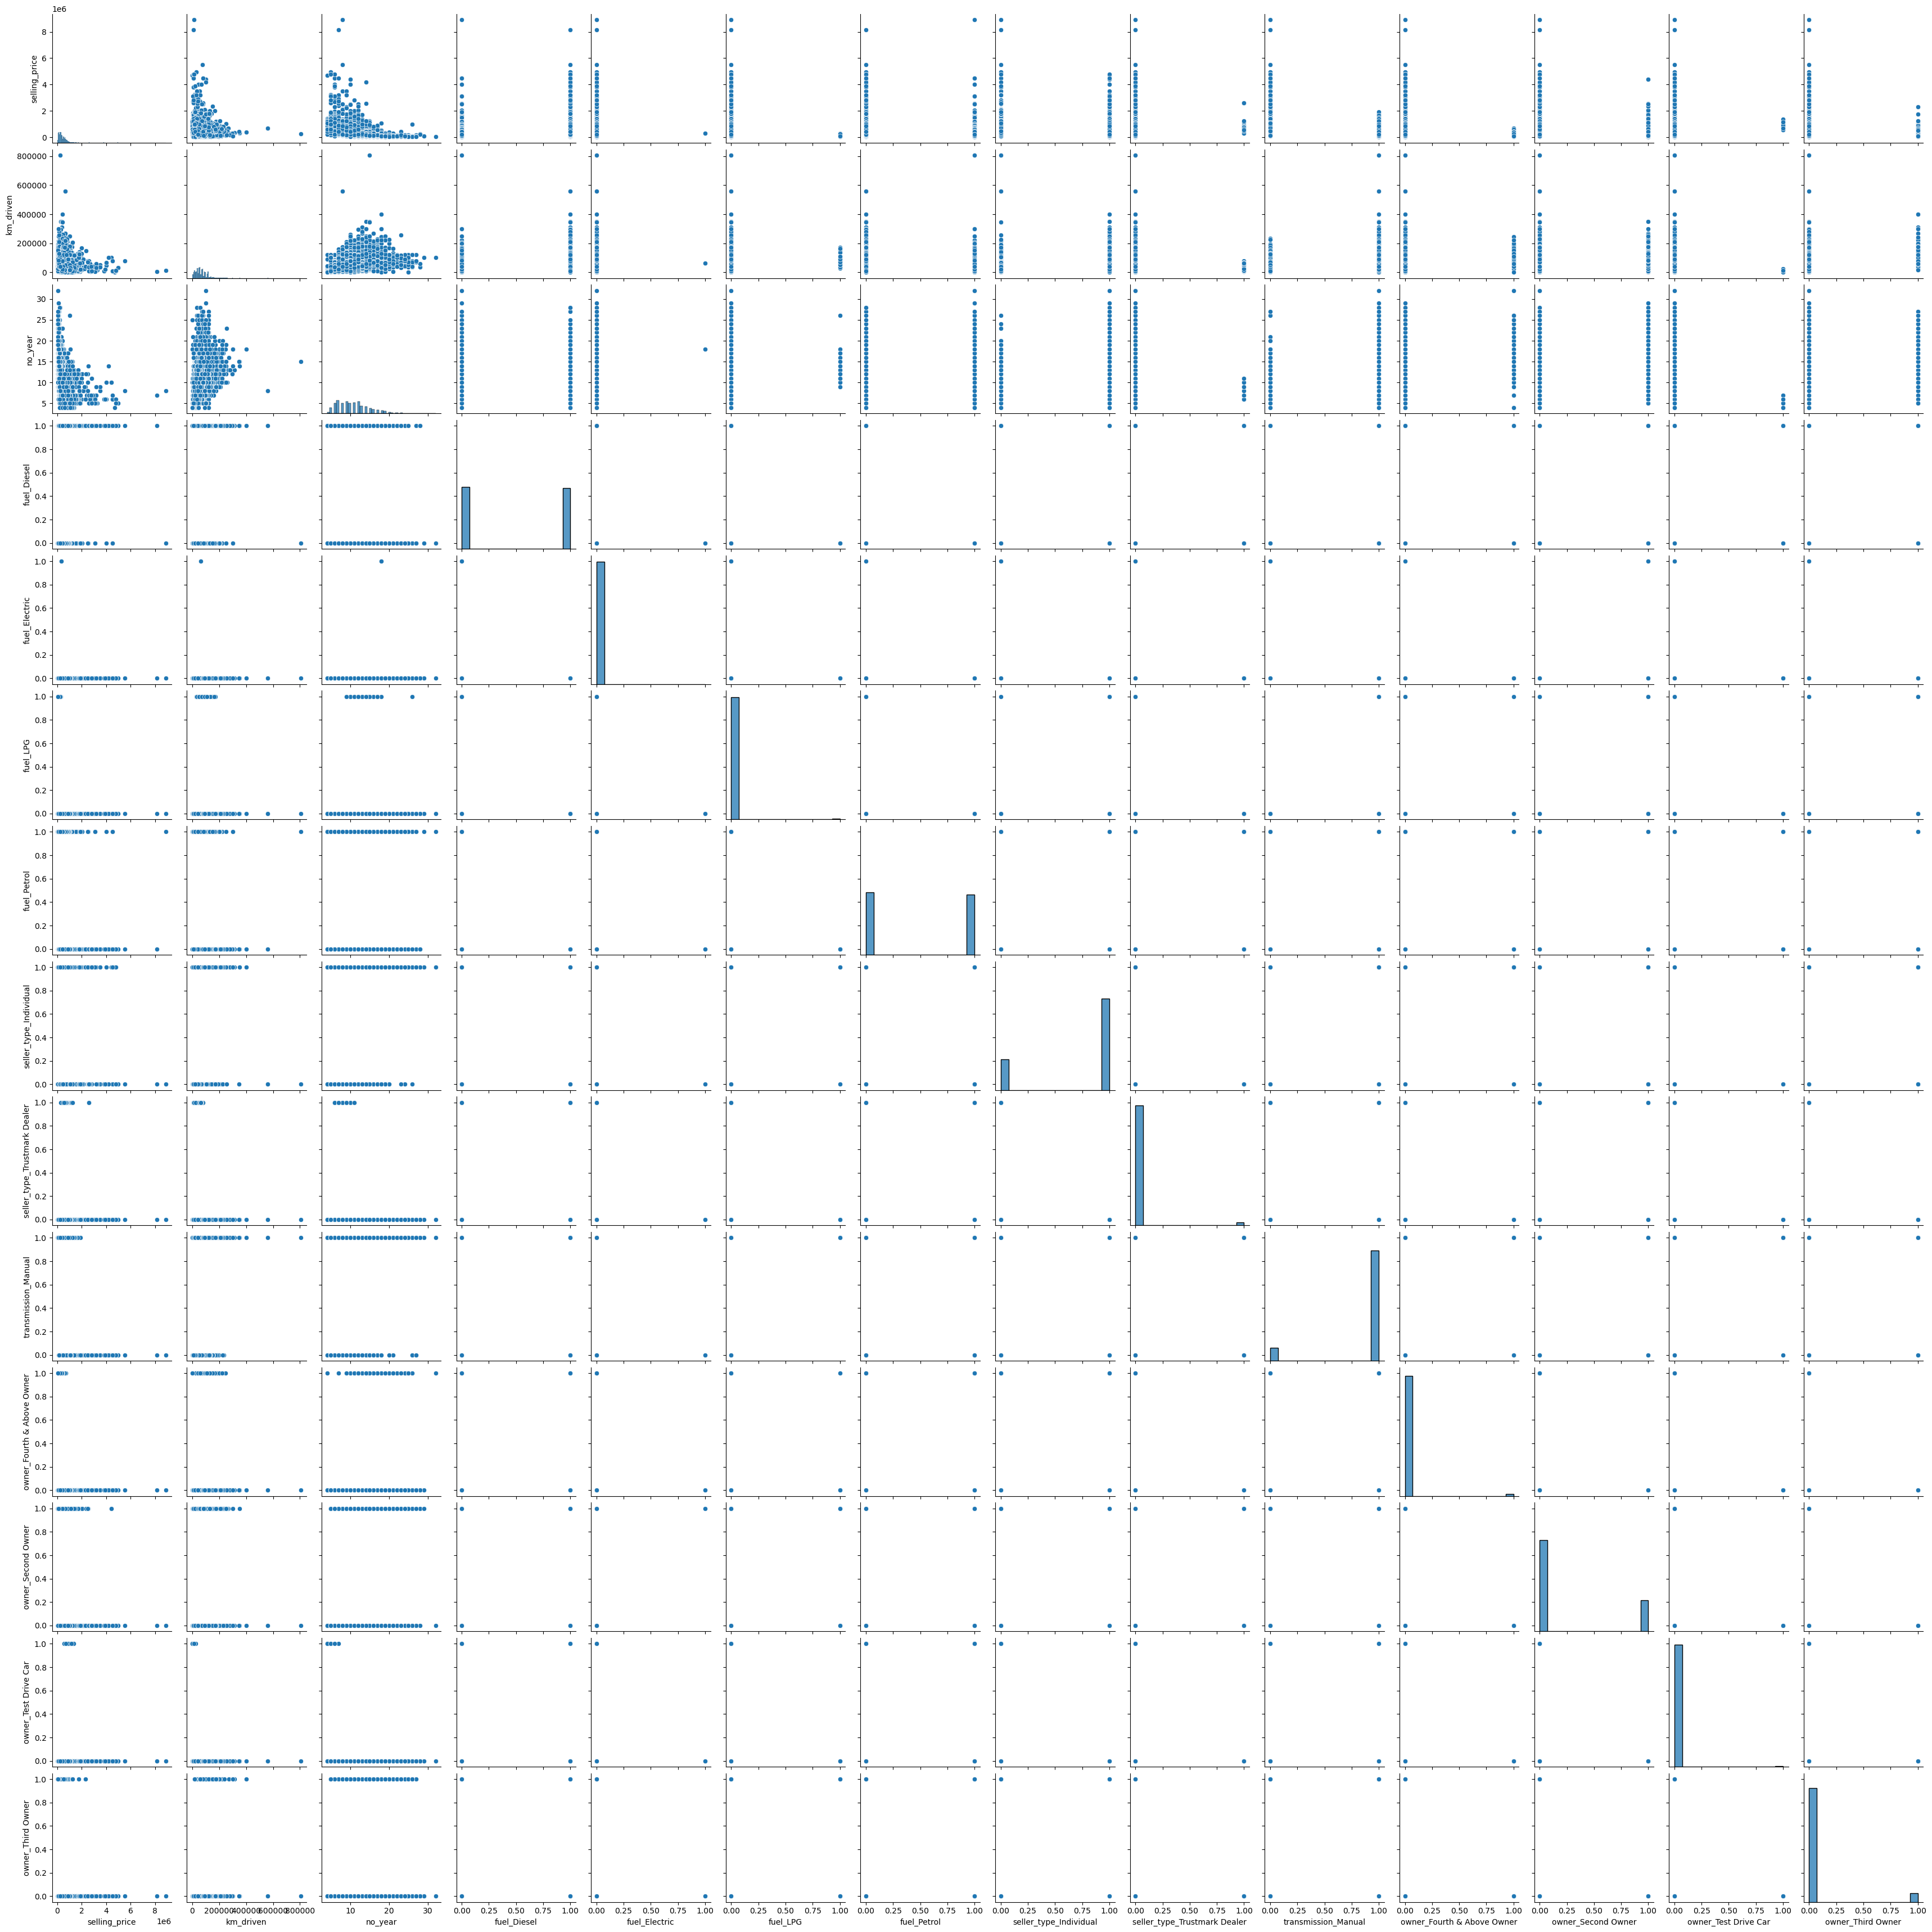

In [20]:
sns.pairplot(last_dataset)

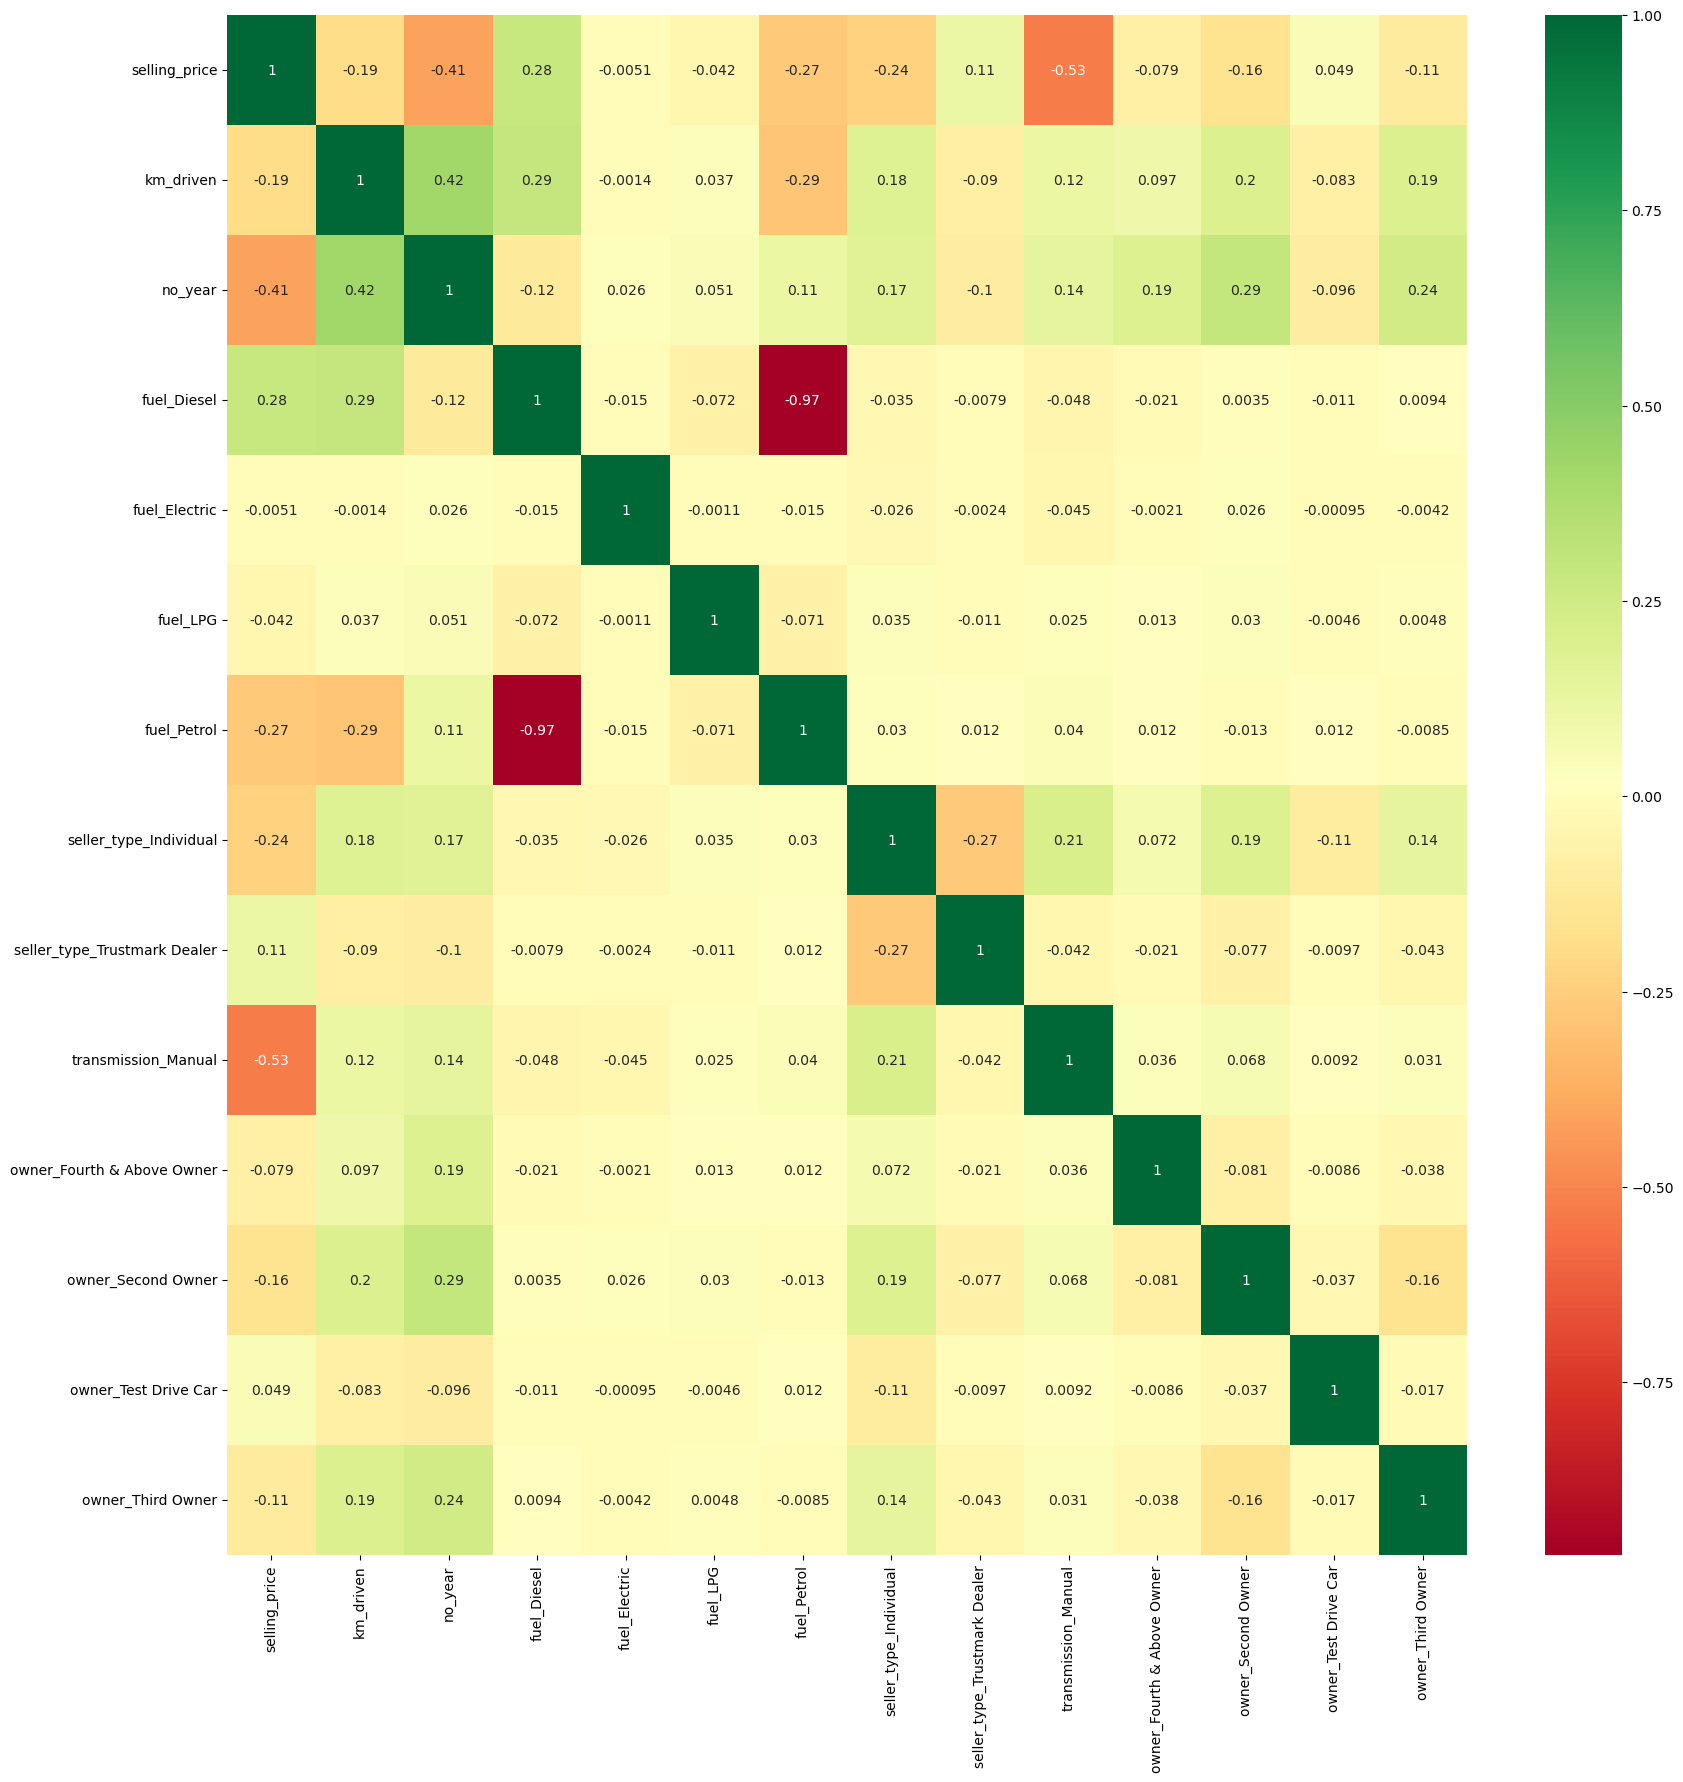

In [21]:
top_corr_feature=correlation_matrix.index
plt.figure(figsize=(20, 20)) 
g=sns.heatmap(last_dataset[top_corr_feature].corr(),cmap='RdYlGn',annot=True)



In [22]:
last_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,17,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,17,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,12,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,7,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,10,1,0,0,0,1,0,1,0,1,0,0


In [23]:
#independent and dependent features
X=last_dataset.iloc[:,1:]
y=last_dataset.iloc[:,0]

In [24]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,17,0,0,0,1,1,0,1,0,0,0,0
1,50000,17,0,0,0,1,1,0,1,0,0,0,0
2,100000,12,1,0,0,0,1,0,1,0,0,0,0
3,46000,7,0,0,0,1,1,0,1,0,0,0,0
4,141000,10,1,0,0,0,1,0,1,0,1,0,0


In [25]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [26]:
X.shape,y.shape

((4340, 13), (4340,))

In [27]:

import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3472, 13)
X_test shape: (868, 13)
y_train shape: (3472,)
y_test shape: (868,)


In [30]:
model = sm.OLS(y_train, X_train)
results = model.fit()



In [31]:
# Make predictions
y_pred = results.predict(X_test)



In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Create a DataFrame to tabulate the results
results_df = pd.DataFrame({
    'Model': ['OLS'],
    'RMSE': [rmse],
    'R-Squared': [r2],
    'Adj. R-Squared': [adj_r2]
})

# Print the results
print(results_df)

  Model           RMSE  R-Squared  Adj. R-Squared
0   OLS  418241.245556   0.422222        0.413427


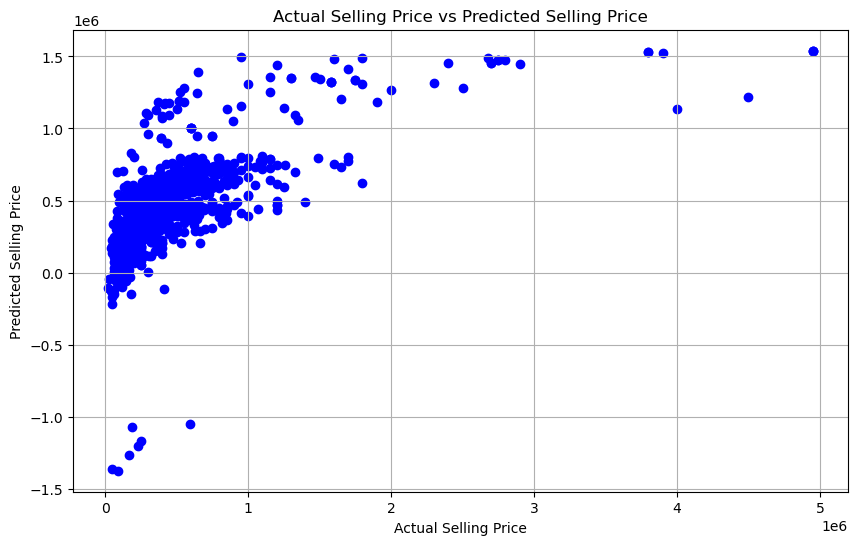

In [33]:


# Plot the predicted vs actual selling prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual Selling Price vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [35]:
#hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#randomized search cv
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#number of features to consider at every split
max_features=['auto','sqrt']
#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [38]:
#create the random grid
random_grid={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
            }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
#use the random grid to search for best hyperparameters
#first create the base model to tune
rf=RandomForestRegressor()

In [40]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
predictions=rf_random.predict(X_test)

In [43]:
predictions

array([1030122.12095462,  534034.19631253,  355528.68684034,
        314201.36136222,  486862.24922826,  183845.67000535,
        682660.69563905,  242353.30682143,  606669.6681928 ,
        346734.53611568,  766530.19595276,  312516.40411825,
        723761.87772719,  142356.41965234,   94543.20341805,
        234075.57404382,  345325.53037952,  463761.48857   ,
        348226.23746746,  616070.92900697,  328359.62168705,
        527266.50305046,  145001.48334516,  522794.71520359,
        712044.05018234,  303450.98431148,  526168.21904668,
        489328.63941857,  680792.70469654,  319764.54764927,
        715770.4481975 ,  100721.49608329,  442033.8342975 ,
        840685.18356883,  530774.09285512,  430333.3307349 ,
        354848.42645658,  352502.60457404,  241325.27900319,
        527375.12378978,  262651.84644865,  210733.41608587,
        120930.17656018,  237791.10292162,  446808.72024572,
        753387.15156644,  644017.70574358,  294036.55680896,
        344568.05686469,

<Axes: xlabel='selling_price', ylabel='Density'>

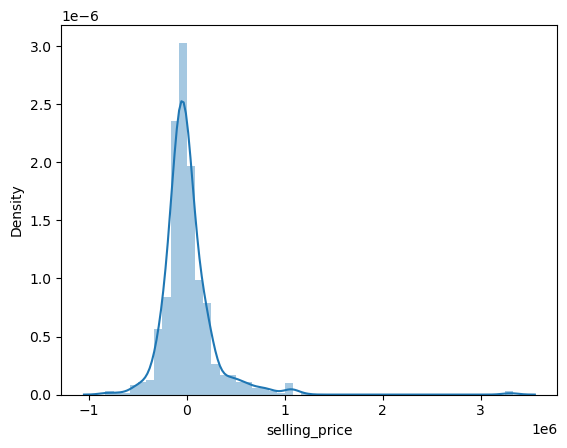

In [44]:
sns.distplot(y_test-predictions)

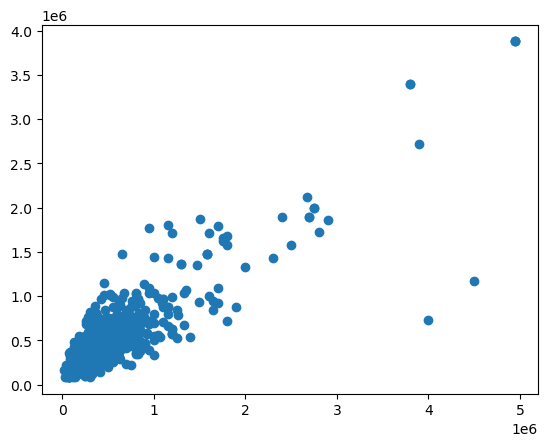

In [45]:
plt.scatter(y_test,predictions)

In [46]:
import pickle
#open a file ,where you and store the data
file = open('random_forest_regression_model.pkl','wb')
#dump info to that file
pickle.dump(rf,file)